# Logistic Regression Machine Learning Method Using Scikit Learn and Pandas Python - Tutorial 31

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

#### Visualisation parameters

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')


#### Reading in cars dataset

In [3]:
data = pd.read_csv('H:\Data\daniel_corcoran_python_projects\datasets\mtcars.csv')
data.head(3)
data.shape

(32, 12)

#### Creating cars subset

In [4]:
cars_data = data.ix[:,(5,11)].values
cars_data_names = ["drat", "carb"]
y = data.ix[:,9].values

H:\Data\daniel_corcoran_python_projects\venv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


#### Meeting condition 1: Independence between features

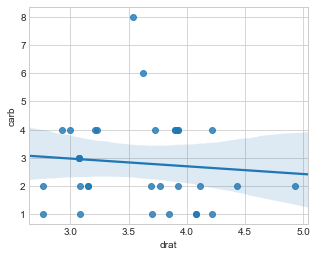

In [5]:
#check visually using scatterplot

sns.regplot(x = 'drat', y = 'carb', data = data, scatter = True)

In [6]:
drat = data['drat']
carb = data['carb']
spearmanr_coefficient, p_value = spearmanr(drat, carb)
print("spearman coefficient : " + str(spearmanr_coefficient))

spearman coefficient : -0.1252229399201802


#### Meeting condition 2: No Nulls

In [7]:
data.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

#### Meeting condition 3: Binary or Ordinal target feature

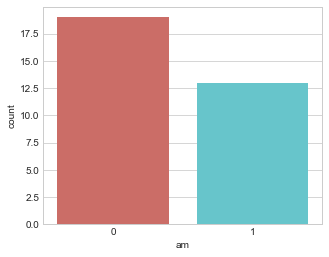

In [8]:
sns.countplot(x = 'am', data = data, palette = 'hls')

In [9]:
data['am'].value_counts()

0    19
1    13
Name: am, dtype: int64

#### Meeting condition 4: Sufficient Dataset Size (at least 50 observations or records for each independant variable)

In [10]:
data.shape

(32, 12)

#### Deploying and evaluating model

In [11]:
X = scale(cars_data)

In [12]:
LogReg = LogisticRegression()
LogReg.fit(X, y)
LogReg.score(X, y)
#log reg score closer to 0 means model does not fit at all

0.8125

In [13]:
y_pred = LogReg.predict(X)

from sklearn.metrics import classification_report
cr = classification_report(y, y_pred)

In [14]:
print(cr)

             precision    recall  f1-score   support

          0       0.88      0.79      0.83        19
          1       0.73      0.85      0.79        13

avg / total       0.82      0.81      0.81        32

